In [1]:
# The C2QA pacakge is currently not published to PyPI. 
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

## Plotting Wigner functions
The following is an example of using the c2qa.util module to plot Wigner functions for a QisKit StateVector.

In [2]:
import c2qa
import qiskit

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)

### Initialize Fock state to zero

In [14]:
qmr0 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qr0 = qiskit.QuantumRegister(size=1)
circuit0 = c2qa.CVCircuit(qmr0, qr0)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit0.initialize([1,0], qr0[0])
# circuit0.initialize([0,1], qr0[0])

# Initialize the qumode to a zero Fock sate
circuit0.cv_initialize(0, qmr0[0])

# ... Your circtuit here ...

state0, _ = c2qa.util.simulate(circuit0)
print(state0)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [5]:
# c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.cv_partial_trace(circuit0, state0))

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


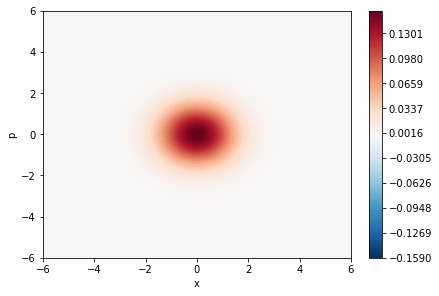

In [6]:
c2qa.util.plot_wigner(circuit0, state0)

### Initialize Fock state to one

In [17]:
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qr1 = qiskit.QuantumRegister(size=1)
circuit1 = c2qa.CVCircuit(qmr1, qr1)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit1.initialize([1,0], qr1[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a one Fock sate
circuit1.cv_initialize(1, qmr1[0])

# ... Your circtuit here ...

state1, _ = c2qa.util.simulate(circuit1)
print(state1)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [18]:
# c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.cv_partial_trace(circuit1, state1))

DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


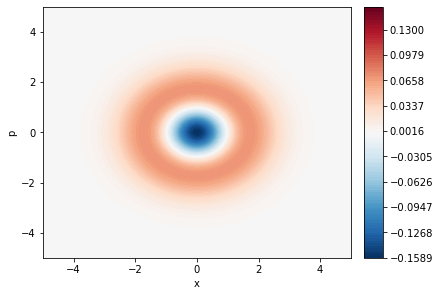

In [19]:
c2qa.util.plot_wigner(circuit1, state1)

### Displace the vaccuum and find that the cutoff is not sufficient

#### Insufficient cutoff

In [5]:
import numpy

In [9]:
qmr2 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qr2 = qiskit.QuantumRegister(size=1)
circuit2 = c2qa.CVCircuit(qmr2, qr2)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit2.initialize([1,0], qr2[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
circuit2.cv_initialize(0, qmr2[0])

# Displace the vaccuum using the displacement gate
# Displace the quasi-probability distribution along the position axis x with a real number
# circuit2.cv_d(numpy.pi/2,qmr1[0])
# Displace the quasi-probability distribution along the momentum axis with an imaginary number
circuit2.cv_d(numpy.pi/2*1j,qmr2[0])


state2, _ = c2qa.util.simulate(circuit2)
print(state2)

qumodes:  00  qubits:  0     with amplitude:  0.2787546210601914
qumodes:  10  qubits:  0     with amplitude:  -0.3635835128285616
occupation modes  [0.13219297080075681, 0.0]
occupation qubits  [0.0]
Statevector([ 0.27875462+0.j        ,  0.        +0.51187782j,
             -0.36358351+0.j        ,  0.        -0.72669388j,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [32]:
# c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.cv_partial_trace(circuit2, state2))

DensityMatrix([[ 0.07770414+0.j        ,  0.        -0.14268831j,
                -0.10135058+0.j        ,  0.        +0.20256928j],
               [ 0.        +0.14268831j,  0.2620189 +0.j        ,
                 0.        -0.18611034j, -0.37197848+0.j        ],
               [-0.10135058+0.j        ,  0.        +0.18611034j,
                 0.13219297+0.j        ,  0.        -0.26421391j],
               [ 0.        -0.20256928j, -0.37197848+0.j        ,
                 0.        +0.26421391j,  0.52808399+0.j        ]],
              dims=(2, 2))


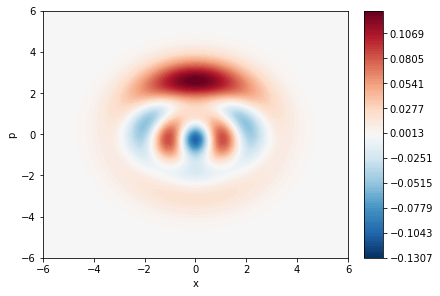

In [33]:
c2qa.util.plot_wigner(circuit2, state2)

# Not the expected behavior of displacing the vaccuum, which should simply shift the quasi-probability distribution without distorting it.

#### Sufficient cutoff

In [22]:
# Augment the number of qubits per mode
qmr3 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=6)
qr3 = qiskit.QuantumRegister(size=1)
circuit3 = c2qa.CVCircuit(qmr3, qr3)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit3.initialize([1,0], qr3[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
circuit3.cv_initialize(0, qmr3[0])

# Displace the vaccuum using the displacement gate
# Displace the quasi-probability distribution along the position axis x with a real number
# circuit2.cv_d(numpy.pi/2,qmr1[0])
# Displace the quasi-probability distribution along the momentum axis with an imaginary number
circuit3.cv_d(numpy.pi/2*1j,qmr3[0])

state3, _ = c2qa.util.simulate(circuit3)
occ =c2qa. util.stateread(state3, 1, 1, 6)

print(state3)

qumodes:  0  qubits:  0     with amplitude:  0.29121293321402153
qumodes:  0  qubits:  0     with amplitude:  -0.5080838785197898
qumodes:  0  qubits:  0     with amplitude:  0.3618966358873723
qumodes:  0  qubits:  0     with amplitude:  -0.16302855256512574
qumodes:  0  qubits:  0     with amplitude:  0.05375382997343648
qumodes:  0  qubits:  0     with amplitude:  -0.013980667678334864
qumodes:  1  qubits:  0     with amplitude:  0.003002483995265889
qumodes:  1  qubits:  0     with amplitude:  -0.0005491421264957359
qumodes:  1  qubits:  0     with amplitude:  8.746189732834106e-05
qumodes:  1  qubits:  0     with amplitude:  -1.2336669643403652e-05
qumodes:  1  qubits:  0     with amplitude:  1.5615140309204473e-06
qumodes:  2  qubits:  0     with amplitude:  -1.7925226712906443e-07
qumodes:  2  qubits:  0     with amplitude:  1.8824995124608757e-08
qumodes:  2  qubits:  0     with amplitude:  -1.8218723642558929e-09
qumodes:  2  qubits:  0     with amplitude:  1.634921121277146e-

In [23]:
# c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.cv_partial_trace(circuit3, state3))

DensityMatrix([[ 8.48049725e-02+0.00000000e+00j,
                 0.00000000e+00-1.33211339e-01j,
                -1.47960597e-01+0.00000000e+00j, ...,
                 0.00000000e+00-1.09396731e-31j,
                -2.17914529e-32+0.00000000e+00j,
                 0.00000000e+00+4.48291981e-33j],
               [ 0.00000000e+00+1.33211339e-01j,
                 2.09247882e-01+0.00000000e+00j,
                 0.00000000e+00-2.32415962e-01j, ...,
                 1.71839983e-31+0.00000000e+00j,
                 0.00000000e+00-3.42299342e-32j,
                -7.04175398e-33+0.00000000e+00j],
               [-1.47960597e-01+0.00000000e+00j,
                 0.00000000e+00+2.32415962e-01j,
                 2.58149228e-01+0.00000000e+00j, ...,
                 0.00000000e+00+1.90866232e-31j,
                 3.80198976e-32+0.00000000e+00j,
                 0.00000000e+00-7.82142215e-33j],
               ...,
               [ 0.00000000e+00+1.09396731e-31j,
                 1.71839983e-31

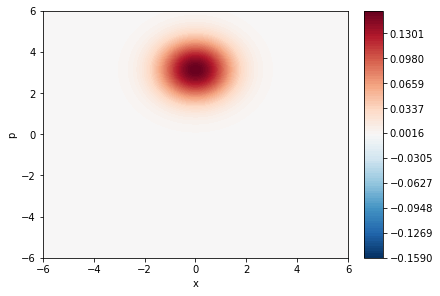

In [24]:
c2qa.util.plot_wigner(circuit3, state3)

# This is the expected behavior of displacing the vaccuum:
# a simple shift the quasi-probability distribution without distorting it, creating a coherent state.

# ECD

In [9]:
def cv_ecdX(qc, qbr, qmr, qm, alpha):
    qc.ry(-np.pi / 2, qbr[0])
    qc.cv_ecd(alpha, qmr[qm], qbr[0])
    qc.ry(np.pi / 2, qbr[0])
    return qc

def cv_ecdY(qc, qbr, qmr, qm, alpha):
    qc.rx(-np.pi / 2, qbr[0])
    qc.cv_ecd(alpha, qmr[qm], qbr[0])
    qc.rx(np.pi / 2, qbr[0])
    return qc

qumodes:  0  qubits:  0     with amplitude:  (0.46129546956345624-0.46129546956345624j)
qumodes:  0  qubits:  0     with amplitude:  (0.05966280463529767+0.059662804635297634j)
qumodes:  0  qubits:  0     with amplitude:  (0.042187973742227255-0.04218797374222726j)
qumodes:  0  qubits:  0     with amplitude:  (0.0243572379966397+0.02435723799663969j)
qumodes:  0  qubits:  0     with amplitude:  (0.01217861899831988-0.01217861899831987j)
qumodes:  0  qubits:  0     with amplitude:  (0.0054464439904627245+0.005446443990462724j)
qumodes:  0  qubits:  0     with amplitude:  (0.0022235014482135857-0.002223501448213585j)
qumodes:  0  qubits:  0     with amplitude:  (0.0008404045531093023+0.0008404045531093018j)
qumodes:  0  qubits:  0     with amplitude:  (0.00029712787922181856-0.0002971278792218185j)
qumodes:  0  qubits:  0     with amplitude:  (9.904262640727304e-05+9.904262640727301e-05j)
qumodes:  0  qubits:  0     with amplitude:  (3.132002848921222e-05-3.132002848921221e-05j)
qumodes:

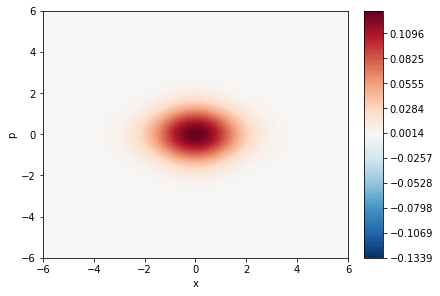

In [10]:
import numpy as np

# Augment the number of qubits per mode
qmr = c2qa.QumodeRegister(num_qumodes=2, num_qubits_per_qumode=6)
qbr = qiskit.QuantumRegister(size=1)
qc = c2qa.CVCircuit(qmr, qbr)

# Initialize your qubit (should have no effect on Fock state Wigner function)
qc.initialize([1,0], qbr[0])

# initialise in x (just h) or y eigenstate
qc.h(qbr[0])
qc.rz(np.pi/2,qbr[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
qc.cv_initialize(0, qmr[0])
qc.cv_initialize(0, qmr[1])

alpha = 1
qc = cv_ecdX(qc, qbr, qmr, 0, alpha)
qc = cv_ecdY(qc, qbr, qmr, 1, alpha)
qc = cv_ecdX(qc, qbr, qmr, 0, -alpha)
qc = cv_ecdY(qc, qbr, qmr, 1, -alpha)

state, _ = c2qa.util.simulate(qc)

# # c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
# print(c2qa.util.cv_partial_trace(qc, state))

c2qa.util.plot_wigner(qc, state)